# Part 1: Data Wrangling

## Introduction

This project is a self-made end to end machine learning project in which I scrape a website called 'Jendela 360'. The scraped dataset is saved in a csv file named 'Apartment Data Raw'. The dataset contains the details of apartment units available to be rented in Jakarta and its surrouding (Jabodetabek region) on December 2nd, 2020. The data discussed here might not be up-to-date. 

Problem Statement of this project:
"Based on the scraped data of apartments in Jakarta and its surrounding, the writer aims to construct a machine learning model to predict the annual rent price of apartment units. If possible, the writer aims to find which feature/factors has the most immpact on an apartment unit's annual rent price."

In the first notebook, we are going to load the raw dataset and conduct data wrangling to draw insights and clean the data. Our goal is to have a cleaned dataset at the end of this notebook, so we can use the cleaned data to create and test regression models in the second notebook.

Last but not least, this project is non-profit and made for learning purposes only.

## Importing Packages

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
raw_df = pd.read_csv('Web Scraping and Dataset\Apartment Dataset Raw_Updated.csv')
#We are going to save the unaltered dataset as raw_df, and use the dataframe 'df' to do the next data wrangling operations

df = raw_df.copy()
df.head()

,Unnamed: 0,URL,Unit_Name,Unit_ID,Apt_Name,No_Rooms,Bathroom,Street,Locality,Region,...,Restaurant,Playground,Total_Facilities,Currency,Annual_Price,Monthly_Price,Deposit_Currency,Deposit_Charge,Service_Currency,Service_Charge
0,0,https://jendela360.com/sewa-apartemen-tamansar...,Taman Sari Semanggi Apartment 1BR Tower A,tssb011,Tamansari Semanggi Apartment,1,1,"Jalan Akri No.134, Kecamatan Setiabudi, Daera...",Semanggi,Jakarta Selatan,...,1,1,23,IDR,96000000,96000000,IDR,8000000,IDR,650000
1,1,https://jendela360.com/sewa-apartemen-puri-par...,Puri Park View Apartment 2BR Semi Furnished,ppvc072,Puri Park View Apartment,2,1,"Jln Pesanggrahan No. 88, Meruya Utara, Kembang...",Kebon Jeruk,Jakarta Barat,...,1,1,19,IDR,30000000,30000000,IDR,5000000,IDR,500000
2,2,https://jendela360.com/sewa-apartemen-metro-pa...,Metro Park Residence 2BR Fully Furnished,mprc040,Metro Park Residence,2,1,"Jl Pilar Mas Utama Raya Kav. 28, Kebon Jeruk, ...",Kedoya,Jakarta Barat,...,1,1,22,IDR,70000000,70000000,IDR,5900000,IDR,880000
3,3,https://jendela360.com/sewa-apartemen-pondok-i...,Pondok Indah Golf Apartment 2BR View Golf Area,ponf003,Pondok Indah Golf Apartment,2,2,"Jl. Metro Kencana IV, Pondok Pinang, Kebayoran...",Pondok Indah,Jakarta Selatan,...,1,1,24,IDR,576000000,576000000,IDR,48000000,NaN,NaN
4,4,https://jendela360.com/sewa-apartemen-season-c...,Season City Apartment 2BR Tower C,sscc039,Season City Apartment,2,1,"JL. Latumenten Raya, No. 33, Grogol, Jakarta B...",Grogol,Jakarta Barat,...,1,1,15,IDR,32000000,32000000,IDR,2700000,IDR,720000


In [3]:
df = df.rename({
    'Unnamed :0' : 'Index'
}, axis = 'columns')

In [4]:
df = df.rename({'Unnamed: 0' : 'Index'}, axis = 'columns')

## Data Cleaning

### Raw Data Shape and Column Description

In [5]:
print(df.columns)

Index(['Index', 'URL', 'Unit_Name', 'Unit_ID', 'Apt_Name', 'No_Rooms',
       'Bathroom', 'Street', 'Locality', 'Region', 'Longitude', 'Latitude',
       'Furnished', 'Area', 'Floor', 'Tower', 'AC', 'Water_Heater',
       'Dining_Set', 'Electricity', 'Bed', 'Access_Card', 'Kitchen', 'Fridge',
       'Washing_Machine', 'TV', 'ATM', 'TV_Cable', 'Grocery', 'Internet',
       'Swim_Pool', 'Laundry', 'Security', 'Basketball', 'Multipurpose_Room',
       'Gym', 'Jogging', 'Tennis', 'Restaurant', 'Playground',
       'Total_Facilities', 'Currency', 'Annual_Price', 'Monthly_Price',
       'Deposit_Currency', 'Deposit_Charge', 'Service_Currency',
       'Service_Charge'],
      dtype='object')


In [6]:
df.shape

(5341, 48)

Each row represents a unique unit of apartment which was displayed on Jendela 360 for rent on 18th October 2020. We have 5339 rows and 47 columns. The columns represent various characteristics of each unit, and is described as follows.

The following columns describe the identification data of each unit (location, name, etc).
* Index: the index of each row (self-ecplanatory) starting at 0.
* URL: the URL each apartment unit page on Jendela 360 website.
* Unit_Name: the apartment unit name on its page.
* Unit_ID: the ID of each page (the last seven characters of the URL). Unique for each apartment unit.
* Apt_Name: the apartment building name of the unit. 
* Street: the street address of the unit.
* Locality: the local district of the unit.
* Region: the city of the unit.
* Longitude and Latitude: the geographical longitude and latitude coordinate of the unit
* Floor: the floor location of the unit.
* Tower: the name of the tower in which the unit is located in.

The following columns describe the facilities of each apartment unit. The two columns which houses numerical (quantitative) data about each apartment unit's facilities are:
* No_Rooms: the number of bedrooms in each apartment unit.
* Area: the area in meter suqared of each apartment unit.

The other columns which describe the facilities of each unit are categorical in nature. The value of each column is '1' if the facility is present, and '0' if the facility is not present. These columns are:
* Furnished (1 represents that the unit is fully furnished, and vice versa)
* AC
* Water_Heater
* Dining_Set
* Electricity 
* Bed
* Access_Card
* Kitchen
* Fridge
* Washing_Machine
* TV
* ATM
* TV_Cable
* Grocery 
* Internet
* Swim_Pool (swimming pool)
* Laundry
* Security
* Basketball (basketball field)
* Multipurpose_room
* Gym
* Jogging (jogging track)
* Tennis (tennis field)
* Restaurant
* Playground

The following columns describe the fee of each unit. The only fee that each apartment has is the annual rent price. Not all apartment units are available to be rented on a monthly term. There are also cases where the deposit and service charges are not listed. Furthermore, it will be very easy to predict the annual price if we know the monthly price, as we just need to multiply it by 12. That's why we are going to remove every fee column in the dataset and only take the annual rent price (in rupiah) as the dependent variable of our model.

* Currency: the currency unit of the listed price.
* Monthly_Price: the monthly payment fee if the tenant wishes to rent it on monthly term.
* Annual_Price: the annual payment fee if the tenant wishes to rent it on yearly term.
* Deposit_Currency: the currency unit of the listed deposit charge.
* Deposit_Charge: the initial deposit charge.
* Service_Currency: the currency unit of the service charge.
* Service_Charge: the service charge of the unit.

### Omiting ERROR Rows

The web scraper uses a ```try:...except:``` block to keep on reading and scraping new pages even if the current iteration raises an error. This is done so the scraping process could be automated, and if a web page raises an error, we don't have to restart the scraping process from the beginning again. If a page raises an error, the whole row (except the URL) will be filled with the string 'ERROR'. The best way to find 'ERROR' rows is to find which rows that have an 'ERROR' Apt_Name column, as that is the features that exists in all apartment unit web pages.

In this step, we are going to remove all 'ERROR' rows.

In [7]:
df.shape

(5341, 48)

In [8]:
df = df[df.Apt_Name != 'ERROR']

In [9]:
df = df.reset_index(drop = True, inplace=False)
df.shape

(5303, 48)

In [10]:
df.isna().sum()

Index                   0
URL                     0
Unit_Name               1
Unit_ID                 0
Apt_Name                0
No_Rooms                0
Bathroom                0
Street                  2
Locality                0
Region                  0
Longitude               0
Latitude                0
Furnished               0
Area                    0
Floor                   0
Tower                   0
AC                      0
Water_Heater            0
Dining_Set              0
Electricity             0
Bed                     0
Access_Card             0
Kitchen                 0
Fridge                  0
Washing_Machine         0
TV                      0
ATM                     0
TV_Cable                0
Grocery                 0
Internet                0
Swim_Pool               0
Laundry                 0
Security                0
Basketball              0
Multipurpose_Room       0
Gym                     0
Jogging                 0
Tennis                  0
Restaurant  

In [11]:
df.columns

Index(['Index', 'URL', 'Unit_Name', 'Unit_ID', 'Apt_Name', 'No_Rooms',
       'Bathroom', 'Street', 'Locality', 'Region', 'Longitude', 'Latitude',
       'Furnished', 'Area', 'Floor', 'Tower', 'AC', 'Water_Heater',
       'Dining_Set', 'Electricity', 'Bed', 'Access_Card', 'Kitchen', 'Fridge',
       'Washing_Machine', 'TV', 'ATM', 'TV_Cable', 'Grocery', 'Internet',
       'Swim_Pool', 'Laundry', 'Security', 'Basketball', 'Multipurpose_Room',
       'Gym', 'Jogging', 'Tennis', 'Restaurant', 'Playground',
       'Total_Facilities', 'Currency', 'Annual_Price', 'Monthly_Price',
       'Deposit_Currency', 'Deposit_Charge', 'Service_Currency',
       'Service_Charge'],
      dtype='object')

### Identifying the Dependent/Outcome Variable

In [12]:
target_variable = ['Annual_Price']
independent_variable = ['No_Rooms',
       'Bathroom', 'Street', 'Locality', 'Region', 'Longitude', 'Latitude',
       'Furnished', 'Area', 'Floor', 'Tower', 'AC', 'Water_Heater',
       'Dining_Set', 'Electricity', 'Bed', 'Access_Card', 'Kitchen', 'Fridge',
       'Washing_Machine', 'TV', 'ATM', 'TV_Cable', 'Grocery', 'Internet',
       'Swim_Pool', 'Laundry', 'Security', 'Basketball', 'Multipurpose_Room',
       'Gym', 'Jogging', 'Tennis', 'Restaurant', 'Playground',
       'Total_Facilities']

Referring to the initial problem statement of this project, we hereby decide that the annual rent price of the apartment will be our dependent variable for the regression model. 

Furthermore, we should not look at the values from monthly price, deposit charge, and service charge, as we would like to predict the annual rent price only using the apartment unit's identification data (location) and facilities. 

After deciding which variable will be our outcome variable, we should make sure that the annual price data is in the same currency unit. If the currency of the annual rent price is in dollars, we have to convert it to Rupiah.

The assumption used is that 1 USD = 14,700 IDR.

In [13]:
df.Currency.value_counts()

Currency
IDR    5251
USD      52
Name: count, dtype: int64

- 5251 rows dengan currency IDR
- 52 rows dengan currenncy USD

Tugas selanjutnya: konversi baris-baris yang "Annual_Price" nya tercatat dalam currency USD

As we can see, the 'Annual_Price' has the data type of object. This means we need to convert it to float first, before multiplying it by 14700 if it is in USD to convert it properly. 

In [14]:
df[['Annual_Price']].head()

,Annual_Price
0,96000000
1,30000000
2,70000000
3,576000000
4,32000000


In [15]:
df[['Annual_Price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Annual_Price  5303 non-null   object
dtypes: object(1)
memory usage: 41.6+ KB


In [16]:
for i in df['Annual_Price'].head():
    print(i*3)
    print(float(i)*3)
    print()

960000009600000096000000
288000000.0

300000003000000030000000
90000000.0

700000007000000070000000
210000000.0

576000000576000000576000000
1728000000.0

320000003200000032000000
96000000.0



Step 1: Bikin list kosong yang bernama `Rupiah_Annual_Price`

Step 2: lihat kolom Currency
    
    - Jika Currency adalah 'USD', maka kalikan 14700, baru tambahkan ke list `Rupiah_Annual_Price`
    
    - Jika Currency adalah 'IDR', biarkan saja, tambahkan ke list `Rupiah_Annual_Price`

########
########
Selingan: belajar `zip`

In [17]:
list_nama = ['Abdul', 'Budi', 'Charlie', 'Doni', 'Endang']
list_nilai = [80, 100, 90, 60, 55]
list_kelulusan = ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus']

for nama, nilai, lulus_status in zip(list_nama, list_nilai, list_kelulusan):
    print("Nama: ", nama)
    print("Nilai: ", nilai)
    print("Kelulusan: ", lulus_status)
    print()

Nama:  Abdul
Nilai:  80
Kelulusan:  Lulus

Nama:  Budi
Nilai:  100
Kelulusan:  Lulus

Nama:  Charlie
Nilai:  90
Kelulusan:  Lulus

Nama:  Doni
Nilai:  60
Kelulusan:  Tidak Lulus

Nama:  Endang
Nilai:  55
Kelulusan:  Tidak Lulus



########
########
Selingan Selesai

In [18]:
Rupiah_Annual_Price = list()
currency_change_counter = 0  # sanity check

for cur, price in zip(df['Currency'], df['Annual_Price']):
    if cur == 'USD':
        new_price = float(price)*14700
        currency_change_counter += 1
    else:
        new_price = float(price)

    Rupiah_Annual_Price.append(new_price)

df['Rupiah_Annual_Price'] = Rupiah_Annual_Price
print("Berapa kali terjadi pergantian currency?")
print(currency_change_counter)

Berapa kali terjadi pergantian currency?
52


The currency_changed counter is used to tell us how many currency conversion has been done, and we are glad to see that there are 52 currency conversions, which is the same number of 'USD' occurences in the 'Currency' column of our dataset.

Next, we are going to remove the columns which are no longer needed ('Currency', 'Annual_Price' 'Monthly_Price', 'Deposit_Currency', 'Deposit_Charge', 'Service_Currency', 'Service_Charge'). 

We are then renaming the 'Rupiah_Annual_Price' to 'AnnualPrice'.

In [19]:
df = df.drop(['Currency', 'Annual_Price', 'Monthly_Price', 'Deposit_Currency', 'Deposit_Charge', 'Service_Currency', 
              'Service_Charge'], axis = 'columns')
df = df.rename({'Rupiah_Annual_Price':'AnnualPrice'}, axis = 'columns')

In [20]:
df.head()

,Index,URL,Unit_Name,Unit_ID,Apt_Name,No_Rooms,Bathroom,Street,Locality,Region,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
0,0,https://jendela360.com/sewa-apartemen-tamansar...,Taman Sari Semanggi Apartment 1BR Tower A,tssb011,Tamansari Semanggi Apartment,1,1,"Jalan Akri No.134, Kecamatan Setiabudi, Daera...",Semanggi,Jakarta Selatan,...,1,1,1,1,1,1,1,1,23,96000000.0
1,1,https://jendela360.com/sewa-apartemen-puri-par...,Puri Park View Apartment 2BR Semi Furnished,ppvc072,Puri Park View Apartment,2,1,"Jln Pesanggrahan No. 88, Meruya Utara, Kembang...",Kebon Jeruk,Jakarta Barat,...,1,0,1,1,1,0,1,1,19,30000000.0
2,2,https://jendela360.com/sewa-apartemen-metro-pa...,Metro Park Residence 2BR Fully Furnished,mprc040,Metro Park Residence,2,1,"Jl Pilar Mas Utama Raya Kav. 28, Kebon Jeruk, ...",Kedoya,Jakarta Barat,...,1,0,1,1,1,0,1,1,22,70000000.0
3,3,https://jendela360.com/sewa-apartemen-pondok-i...,Pondok Indah Golf Apartment 2BR View Golf Area,ponf003,Pondok Indah Golf Apartment,2,2,"Jl. Metro Kencana IV, Pondok Pinang, Kebayoran...",Pondok Indah,Jakarta Selatan,...,1,1,1,1,1,1,1,1,24,576000000.0
4,4,https://jendela360.com/sewa-apartemen-season-c...,Season City Apartment 2BR Tower C,sscc039,Season City Apartment,2,1,"JL. Latumenten Raya, No. 33, Grogol, Jakarta B...",Grogol,Jakarta Barat,...,1,0,1,1,0,0,1,1,15,32000000.0


## Selingan: Belajar `pd.melt` dan `pd.pivot_table`


In [23]:
import pandas as pd

# Sample data
data = {
    'Product': ['A', 'A', 'B', 'B', 'C', 'C', 'A'],
    'Region': ['North', 'South', 'North', 'South', 'North', 'South', 'North'],
    'Sales': [100, 150, 200, 180, 130, 170, 200]
}

df2 = pd.DataFrame(data)
df2


,Product,Region,Sales
0,A,North,100
1,A,South,150
2,B,North,200
3,B,South,180
4,C,North,130
5,C,South,170
6,A,North,200


In [24]:
# Create a pivot table summarizing total sales per product in each region
pivot_table = pd.pivot_table(df2, values='Sales', index='Product', columns='Region', aggfunc='sum')

pivot_table

Region,North,South
Product,,
A,300,150
B,200,180
C,130,170


In [26]:
import pandas as pd

# Sample data (wide format)
data = {
    'Product': ['A', 'B', 'C'],
    'Jan_Sales': [100, 200, 130],
    'Feb_Sales': [150, 180, 170],
    'Mar_Sales': [170, 160, 190]
}

df3 = pd.DataFrame(data)
df3

,Product,Jan_Sales,Feb_Sales,Mar_Sales
0,A,100,150,170
1,B,200,180,160
2,C,130,170,190


In [29]:
| Product | Date       | Sold |
| A       | 2024-06-01 | 100  |
| A       | 2024-07-01 | 200  |

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3757782179.py, line 2)

In [28]:
# Convert the wide format to long format
melted_df = pd.melt(df3, id_vars='Product', var_name='Month', value_name='Sales')

melted_df

,Product,Month,Sales
0,A,Jan_Sales,100
1,B,Jan_Sales,200
2,C,Jan_Sales,130
3,A,Feb_Sales,150
4,B,Feb_Sales,180
5,C,Feb_Sales,170
6,A,Mar_Sales,170
7,B,Mar_Sales,160
8,C,Mar_Sales,190


## Exploratory Data Analysis

In [30]:
df.columns

Index(['Index', 'URL', 'Unit_Name', 'Unit_ID', 'Apt_Name', 'No_Rooms',
       'Bathroom', 'Street', 'Locality', 'Region', 'Longitude', 'Latitude',
       'Furnished', 'Area', 'Floor', 'Tower', 'AC', 'Water_Heater',
       'Dining_Set', 'Electricity', 'Bed', 'Access_Card', 'Kitchen', 'Fridge',
       'Washing_Machine', 'TV', 'ATM', 'TV_Cable', 'Grocery', 'Internet',
       'Swim_Pool', 'Laundry', 'Security', 'Basketball', 'Multipurpose_Room',
       'Gym', 'Jogging', 'Tennis', 'Restaurant', 'Playground',
       'Total_Facilities', 'AnnualPrice'],
      dtype='object')

In this step, we are going to do some data exploration to gain more insights on our dataset. First, we'll drop columns which we think might not be insightful for our model. We'll drop the 'Street' and 'Tower' column as it's quite difficult to parse and does not supply us with any insightful information. The 'Street' column is irrelevant as we have 'Locality', 'Region', as well as 'Longitude' & 'Latitude' column to draw geospatial insights form. The 'Tower' column is dropped because it's the name of the tower of each unit, and each apartment complex has different tower names. We suspect that the 'Unit_Name' and 'Apt_Name' might be dropped too, but we'll inspect them in a little bit to see if there are any insights we can draw from those columns. 

Note: We'll keep the 'URL' and 'Unit_ID' until we finish exploring the data in case we want to check on specific apartment units.

In [31]:
df = df.drop(['Street', 'Tower'], axis = 'columns')

Next, we are going to inspect the 'Unit_Name' and 'Apt_Name' columns.

In [32]:
df[['Apt_Name', 'Unit_Name']].head()

,Apt_Name,Unit_Name
0,Tamansari Semanggi Apartment,Taman Sari Semanggi Apartment 1BR Tower A
1,Puri Park View Apartment,Puri Park View Apartment 2BR Semi Furnished
2,Metro Park Residence,Metro Park Residence 2BR Fully Furnished
3,Pondok Indah Golf Apartment,Pondok Indah Golf Apartment 2BR View Golf Area
4,Season City Apartment,Season City Apartment 2BR Tower C


It seems that the 'Apt_Name' column just indicates the overall name of our Apartment complex, while the 'Unit_Name' mentions the number of bedrooms, and in some case, the furnished status of the apartment. Interestingly, the furnished status in 'Unit_Name' are divided into three levels: 'Non Furnished', 'Semi Furnished', and 'Fully Furnished'. However, in our 'Furnished' column, there are only two levels: 'Non Furnished' and 'Fully Furnished'.

We can add a new level to our 'Furnished' feature by creating a 'Semi Furnished' level if the 'Unit_Name' of a particular row has the word 'semi' in it. We'll create a new column called 'FurnishedNew' for this feature.

In [35]:
df['Furnished'].value_counts()

Furnished
1    4449
0     854
Name: count, dtype: int64

Syarat: 
1. Jika 'Furnished' == 1, maka dia Full Furnish
2. Jika 'Furnished' == 0, TAPI DI NAMA UNIT NYA ADA TULISAN 'SEMI' maka dia Semi Furnish
3. Jika 'Furnished' == 0, dan tidak ada tulisan SEMI, maka dia 'Non-Furnished'

In [36]:
FurnishedNew = list()

for furnish_status, u_name in zip(df['Furnished'], df['Unit_Name']):
    if furnish_status == '1':
        FurnishedNew.append('Full')
    else:
        if 'semi' in u_name.lower():
            FurnishedNew.append('Semi')
        else:
            FurnishedNew.append('Non')

df['FurnishedNew'] = FurnishedNew

In [37]:
df[['Unit_Name', 'Furnished', 'FurnishedNew']].head(8)

,Unit_Name,Furnished,FurnishedNew
0,Taman Sari Semanggi Apartment 1BR Tower A,1,Full
1,Puri Park View Apartment 2BR Semi Furnished,0,Semi
2,Metro Park Residence 2BR Fully Furnished,1,Full
3,Pondok Indah Golf Apartment 2BR View Golf Area,1,Full
4,Season City Apartment 2BR Tower C,0,Non
5,Green Pramuka City Apartment 2BR Fully Furnished,1,Full
6,Springhill Terrace Residence 2BR Fully Furnished,1,Full
7,Kemang Village Apartment 3BR Fully Furnished,1,Full


In [38]:
df.FurnishedNew.value_counts()

FurnishedNew
Full    4449
Non      688
Semi     166
Name: count, dtype: int64

We'll see if this new feature is better than the existing 'Furnished' column. If this feature makes the model worse, then we'll simply use the two level 'Furnished' feature. We'll then drop the 'Apt_Name' and 'Unit_Name' column.

In [39]:
df = df.drop(['Unit_Name', 'Apt_Name'], axis = 'columns')

In [40]:
df.head()

,Index,URL,Unit_ID,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,...,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice,FurnishedNew
0,0,https://jendela360.com/sewa-apartemen-tamansar...,tssb011,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,...,1,1,1,1,1,1,1,23,96000000.0,Full
1,1,https://jendela360.com/sewa-apartemen-puri-par...,ppvc072,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,...,0,1,1,1,0,1,1,19,30000000.0,Semi
2,2,https://jendela360.com/sewa-apartemen-metro-pa...,mprc040,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,...,0,1,1,1,0,1,1,22,70000000.0,Full
3,3,https://jendela360.com/sewa-apartemen-pondok-i...,ponf003,2,2,Pondok Indah,Jakarta Selatan,106.7846,-6.272637,1,...,1,1,1,1,1,1,1,24,576000000.0,Full
4,4,https://jendela360.com/sewa-apartemen-season-c...,sscc039,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,...,0,1,1,0,0,1,1,15,32000000.0,Non


Next, we are going to analyse each column and see if it is a good feature for our model or not. We will be plotting each feature against the predicted value, the 'AnnualPrice'. While there are other ways to perform feature selection which are relatively more automated, the writer chooses to do this to gain more insights personally on the dataset.

#### Number of Bedrooms

In [42]:
bedroom_df = df[['URL','No_Rooms', 'AnnualPrice']]
bedroom_df.No_Rooms.value_counts()

No_Rooms
2    2567
0    1113
1     990
3     612
4      18
5       2
6       1
Name: count, dtype: int64

The apartment units in our dataset have 0 till 6 'number of bedrooms'. What does '0' number of bedroom means? During the scraping process, the writer discover that studio apartment units are written as having '0' number of bedrooms in the ```.json``` schema of the web page. We can then use ```df.groupby``` to see the average annual rent price of each category.

In [48]:
avg_no_rooms = bedroom_df.groupby(['No_Rooms'])['AnnualPrice'].mean().reset_index().rename({'AnnualPrice':"Average Annual Price"}, axis = 'columns')
avg_no_rooms

,No_Rooms,Average Annual Price
0,0,7.622950e+08
1,1,8.501359e+07
2,2,1.029791e+08
3,3,2.245742e+08
4,4,4.380461e+08
5,5,7.328000e+08
6,6,1.000000e+09


<Axes: xlabel='No_Rooms'>

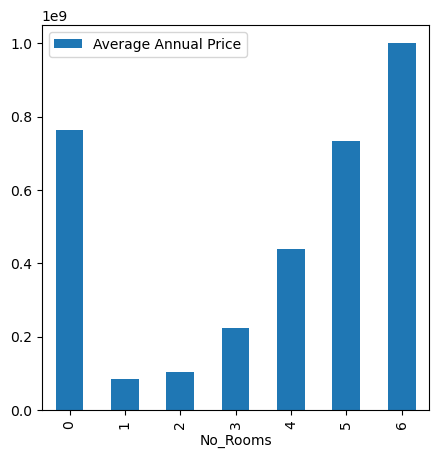

In [49]:
avg_no_rooms.plot(x = 'No_Rooms', y = 'Average Annual Price', kind = 'bar', figsize = [5,5])

First column and we're already greeted with a surprise. Why is the studio apartment unit's average price higher than the average price of apartment units with 6 bedrooms? This is why exploring our dataset manually, or the way I prefer to say it - 'personally', is important. This data does not match our common sense, and we need to investigate it. The first thing to do in this situation is try to check for outliers.

In [56]:
# Furnished Ratio of Studio Apartments
df[df['No_Rooms'] == '6']['FurnishedNew'].value_counts()

FurnishedNew
Full    1
Name: count, dtype: int64

<Axes: xlabel='AnnualPrice'>

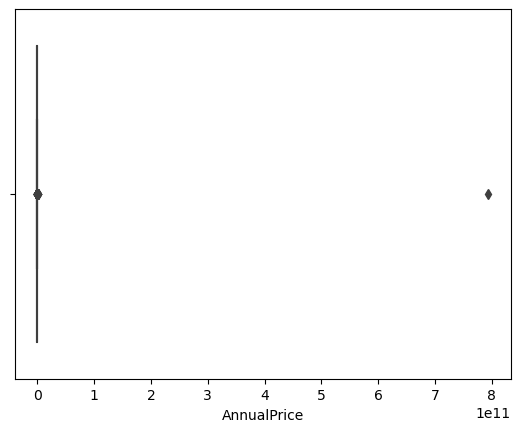

In [57]:
studio_check = bedroom_df['No_Rooms'] == '0'
sns.boxplot(x = bedroom_df[studio_check].AnnualPrice)

First, we filter the 'AnnualPrice' column by 'No_Rooms' category. After selecting the annual rent prices of apartment units which are studio-typed, we can draw the boxplot using seaborn and we see there are two outliers. Let's check these out.

In [58]:
bedroom_df[bedroom_df['No_Rooms'] == '0'].sort_values(by=['AnnualPrice'], ascending = False).head(5)

,URL,No_Rooms,AnnualPrice
1163,https://jendela360.com/sewa-apartemen-signatur...,0,7.938000e+11
647,https://jendela360.com/sewa-apartemen-puri-par...,0,2.500000e+08
1388,https://jendela360.com/sewa-apartemen-senayan-...,0,2.280000e+08
5105,https://jendela360.com/sewa-apartemen-soho-pan...,0,2.200000e+08
3880,https://jendela360.com/sewa-apartemen-kemang-v...,0,2.116800e+08


<Axes: xlabel='AnnualPrice'>

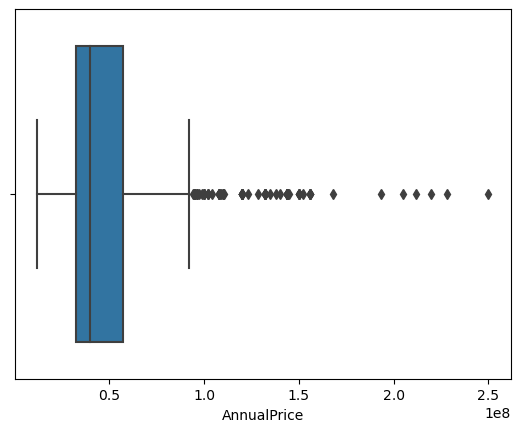

In [63]:
bedroom_df_without_outlier = bedroom_df.drop(1163, axis = 'rows')
studio_check = bedroom_df_without_outlier['No_Rooms'] == '0'
sns.boxplot(x = bedroom_df_without_outlier[studio_check].AnnualPrice)


<Axes: xlabel='No_Rooms'>

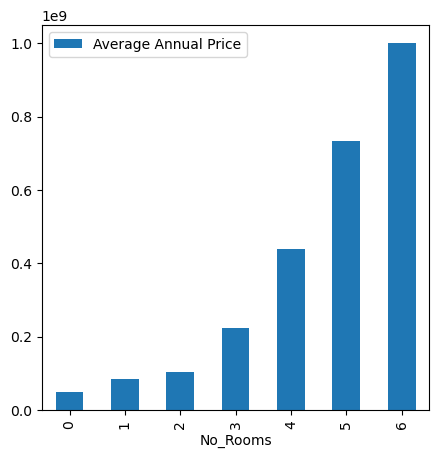

In [64]:
avg_no_rooms = bedroom_df_without_outlier.groupby(['No_Rooms'])['AnnualPrice'].mean().reset_index().rename({'AnnualPrice':"Average Annual Price"}, axis = 'columns')
avg_no_rooms
avg_no_rooms.plot(x = 'No_Rooms', y = 'Average Annual Price', kind = 'bar', figsize = [5,5])

Kesimpulan: 
- Ada 1 studio apartment yang AnnualPrice nya puluhan miliar
- Ini tidak make sense, begitu dia kita hapus, maka Average Annual Price lebih masuk akal
- Penyebab: 
    - Mungkin saja, itu harga apartmennya, tapi ditulis sebagai AnnualPrice
    - Mungkin saja, harga aslinya dalam IDR, tapi ditulis 'Currency' == 'USD'
    - Mungkin saja, ada persoalan lain ketika meng-entry apartmen tersebut (kepencet 0 kebanyakan)

Artinya, kita bisa berasumsi bahwa, row 1163, bisa kita hapus, karena tidak masuk akal. 

In [65]:
df.drop(1163, axis = 'rows', inplace = True)

In [66]:
df['No_Rooms'].value_counts()

No_Rooms
2    2567
0    1112
1     990
3     612
4      18
5       2
6       1
Name: count, dtype: int64

#### Checking on the Updated Dataframe for No_Rooms Feature

  No_Rooms  Average Annual Price
0        0          4.913155e+07
1        1          8.501359e+07
2        2          1.029791e+08
3        3          2.245742e+08
4        4          4.380461e+08
5        5          7.328000e+08
6        6          1.000000e+09


<Axes: xlabel='No_Rooms'>

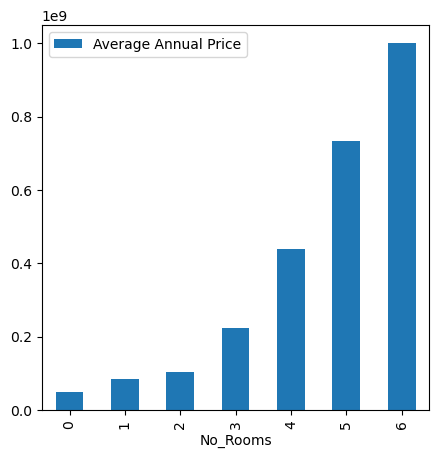

In [67]:
bedroom_df_updated = df[['URL','No_Rooms', 'AnnualPrice']]
avg_no_rooms = bedroom_df_updated.groupby('No_Rooms')['AnnualPrice'].mean().reset_index().rename({'AnnualPrice':'Average Annual Price'}, axis = 'columns')
print(avg_no_rooms)
avg_no_rooms.plot(x = 'No_Rooms', y = 'Average Annual Price', kind = 'bar', figsize = [5,5])

<Axes: xlabel='No_Rooms', ylabel='AnnualPrice'>

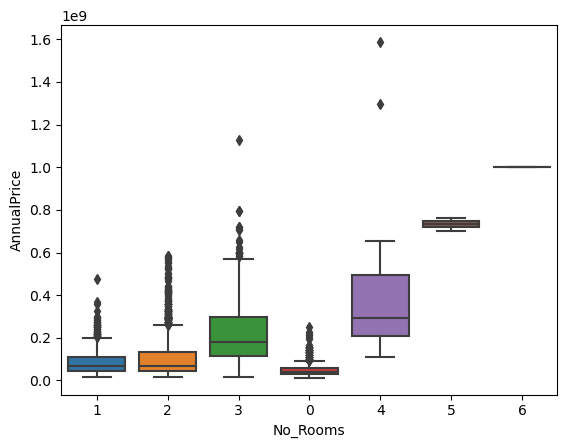

In [68]:
sns.boxplot(x = "No_Rooms", y = 'AnnualPrice', data = df)

In [71]:
bedroom_df_updated[bedroom_df_updated['No_Rooms'] == '4'].sort_values(by = ['AnnualPrice'], ascending = False)

,URL,No_Rooms,AnnualPrice
3923,https://jendela360.com/sewa-apartemen-pakubuwono-residence/pkrf001,4,1.587600e+09
3622,https://jendela360.com/sewa-apartemen-pacific-place-residence/ppre001,4,1.296000e+09
1055,https://jendela360.com/sewa-apartemen-kemang-village-apartment/kmve002,4,6.526800e+08
4604,https://jendela360.com/sewa-apartemen-bumi-mas-apartment/bmse001,4,5.160000e+08
4389,https://jendela360.com/sewa-apartemen-nirvana-residence/nvn-e0001,4,5.070000e+08
793,https://jendela360.com/sewa-apartemen-kemang-village-apartment/kmve004,4,4.560000e+08
2030,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stme007,4,3.500000e+08
4993,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stme006,4,3.500000e+08
4505,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stme004,4,3.000000e+08
2411,https://jendela360.com/sewa-apartemen-parama-apartment/pmce001,4,2.900000e+08


There we go. Now it made sense - the more number of bedrooms an apartment unit has, the higher the annual rent price. However, there no apartment units which are priced way above the other units in the same category. Through evaluating outliers and checking on the source data, we have 'cleaned' the 'No_Rooms' feature for now. 

The last step taken for this feature column is grouping the categories of '4', '5', and '6'. There are only 3 units out of our more than 5000 rows which have 5 and 6 bedrooms, and that is not quite representative. 

Now, we might ask, why the new category (of units with 4 and more bedrooms) are given the value '4'? Shouldn't it be '4 and more'? 

Yes. It represents the number of bedrooms of 4 and more. However, this categorical variable will be treated as ordinal variable in the machine learning model. That's why we have to keep the values as integers. We'll just have to keep in our mind later when writing the final report, that the number '4' in No_Rooms feature not only represents units with 4 bedrooms, but also units with more than 4 bedrooms. 

#### Analyzing Location Feature Columns

The next part of our features to be discussed are the columns which describe where our unit is on the map. There are four columns being discussed here - two which are categorical ('Locality' and 'Region'), as well as two continuous columns ('Longitude' and 'Latitude'). First let's look at the 'Region' columns.

In [72]:
df.Region.value_counts()

Region
Jakarta Selatan    1526
Jakarta Barat      1346
Jakarta Pusat      1083
Jakarta Utara       422
Jakarta Timur       372
Tangerang           322
Bekasi              100
Depok                68
Bandung              33
Surabaya             13
Karawang              5
Sumedang              4
Bogor                 3
Jogjakarta            1
Semarang              1
Malang                1
Makassar              1
Batam                 1
Name: count, dtype: int64

Whoa. Turns out the scraped pages also includes apartment units from outside Jakarta and its surroundings. To stay true to our problem statement, we'll remove regions outside 'Jabodetabek'. 

Kita hanya mau apartment di: 
- Jakarta
- Bogor
- Depok
- Tangerang
- Bekasi

In [73]:
valid_region = ['Jakarta Barat', 'Jakarta Utara', 'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Pusat', 'Bogor', 'Depok', 'Tangerang', 'Bekasi']
df = df[df['Region'].isin(valid_region)]

Let's visualize the data using a boxplot again. Now, we're investigating if differences in regions affect annual rent price.

<Axes: xlabel='Region', ylabel='AnnualPrice'>

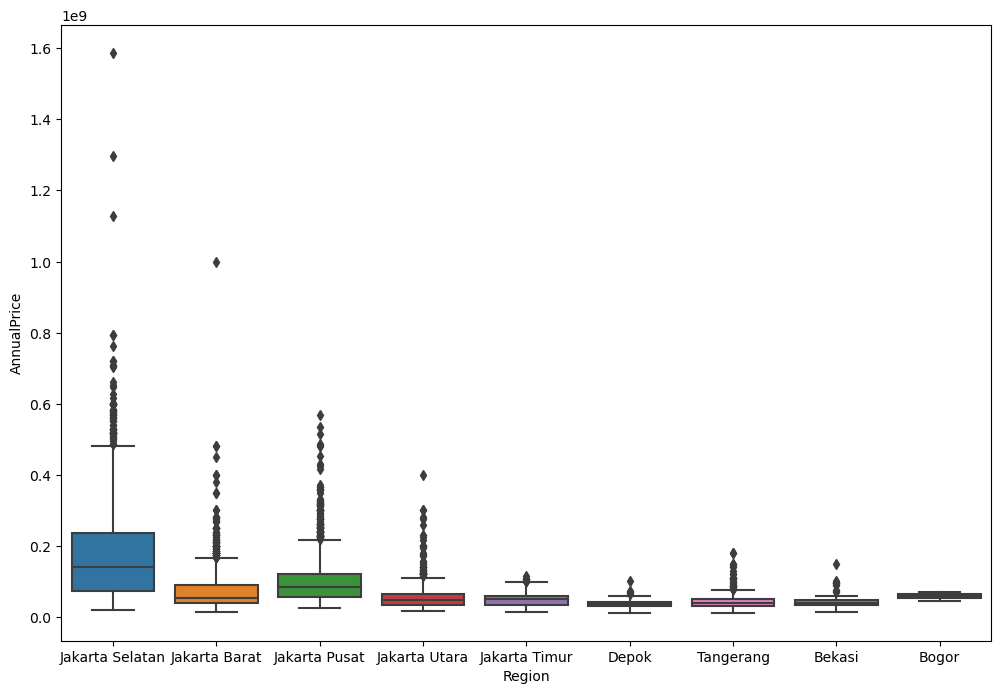

In [74]:
dims = (12,8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x = "Region", y = 'AnnualPrice', data = df, ax=ax)

In [59]:
JakBar = df['Region'] == 'Jakarta Barat'
df[JakBar][['URL', 'AnnualPrice']].sort_values(by = ['AnnualPrice'], ascending=False).head(1)

,URL,AnnualPrice
3611,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stme008,1.000000e+09


From the visualization, we can see that the region in DKI Jakarta with the highest average annual rent price is 'Jakarta Selatan', followed by 'Jakarta Pusat', 'Jakarta Barat', 'Jakarta Utara', and 'Jakarta Timur' consecutively. Regions outside Jakarta have lower average prices than regions inside Jakarta. This distribution makes sense, as it is quite a common knowledge for Jakartans to know that the region with the highest property price in Jakarta is 'Jakarta Selatan'. 

There seems to be an outlier in 'Jakarta Barat', but upon further checking - it's the only unit with 6 bedrooms, so the price reflects more of its number of rooms than its region. We will not remove this data point for now.

There are a few options on how we are going to use the locations columns in our model:

Option 1: Uses one hot encoding on Region. This seems to be the go-to-solution if we wishes to make location a categorical variable. We'll divide the area into six major Regions - West, North, South, East, Center Jakarta, and outside Jakarta (we group Bogor, Depok, Tangerang, and Bekasi into one Region).

Option 2: Uses one hot encoding on Locality. There are over 90 different local districts in this data set, and one hot encoding would mean that we'll have 90+ extra feature columns of zeros and ones. Furthermore, a lot of these local districts have only one apartment unit.

Option 3: Uses the 'Longitude' and 'Latitude' column as continuous variables. This could be the case if we notice a pattern on the longitude and latitude data. We could also do clustering algorithm on longitude and latitude data. 

We'll look into the 'Longitude' and 'Latitude' columns first.

In [60]:
print(df.Longitude.dtype)
print(df.Latitude.dtype)

object
object


It seems that these two columns are classified as 'object' and not 'float' by Pandas. We need to transform them first.

In [61]:
df = df.reset_index(drop = True, inplace=False)
Longitude_Float = list()
Latitude_Float = list()

for i in range(len(df.Index)):
    Longitude_Float.append(float(df.Longitude[i]))
    Latitude_Float.append(float(df.Latitude[i]))

df.drop(['Longitude', 'Latitude'], axis = 'columns')
df['Longitude'] = Longitude_Float
df['Latitude'] = Latitude_Float

<Axes: >

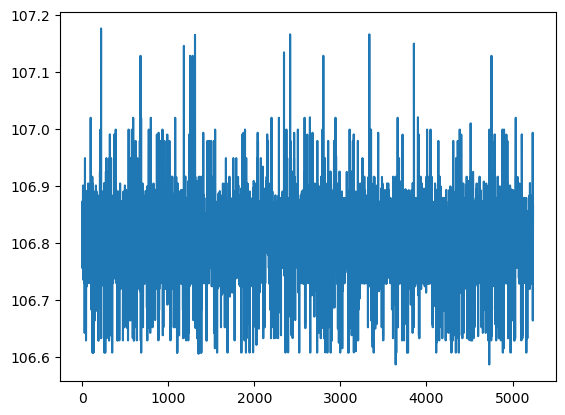

In [62]:
df.Longitude.plot()

After converting both columns to float, let's visualize each column to analyze if there are any outliers. As the geographical location chosen for this project is quite close to each other, there shouldn't be any outliers. The 'Longitude' dataset makes sense: all our apartment units have Longitude between 106.6 until 107.2.

<Axes: >

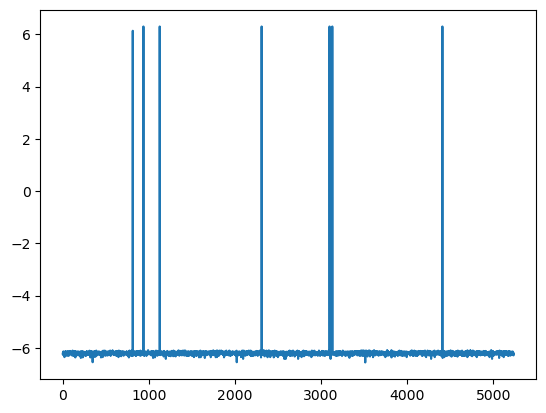

In [63]:
df.Latitude.plot()

The 'Latitude' feature column, however, seems to have yet another issue related to an error in data entering. Most of the apartment units have Latitude around -6, which makes sense, as Jakarta (and its surrounding) are located slightly beneath the Equator. Howver, there are a few data points which have latitude of 6. This is suspicious as it could very well be a case of forgetting to add '-' (the negative sign) during data entry process for these apartment units. For now, let's assume this to be the case, and put a negative value on the latitude feature of these apartment units.

In [64]:
Latitude_fixed = [la if la<0 else -1*la for la in df.Latitude]
df.drop(['Latitude'], axis = 'columns')
df['Latitude'] = Latitude_fixed

<Axes: >

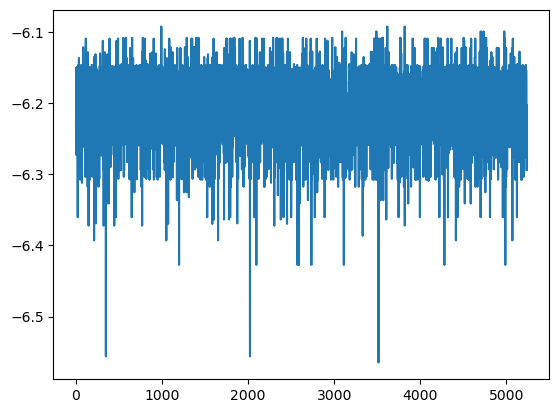

In [65]:
df.Latitude.plot()

This distribution made more sense as the value of 'Latitude' ranges from -6.6 to -6.1, not a big margin, and the three data points with the lowest 'Latitude' seems to be apartment units outside Jakarta (maybe in Bogor/Depok).

#### Analyzing Furnished Status Feature Column

Now, let's visualize and take a look at the two columns describing the furnished status of each apartment unit - the original 'Furnished', and our newly created 'FurnishedNew'. 

<Axes: xlabel='Furnished', ylabel='AnnualPrice'>

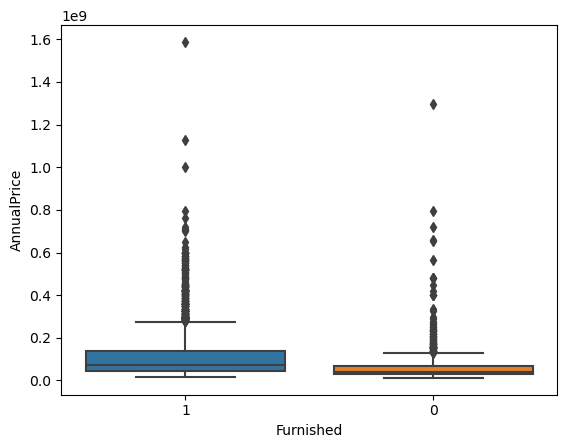

In [77]:
sns.boxplot(data = df, x = 'Furnished', y = 'AnnualPrice')

There are two takeaways from this: first, the discrepancy between non-furnished and fully furnished apartment units' prices doesn't seem to be that big. Second, our new column, 'FeatureNew', shows that semi-furnished apartments have lower prices compared to non-furnished ones. 

What should we make of this? Our new feature column doesn't seem to work well - this might be because not all apartment units which are semi-furnished write that they are 'semi-furnished' in their page name. The population of 'semi-furnished' apartments may be much more than what was being labeled as 'Semi'. This explains two things: why adding an extra category doesn't work well, and why the discrepancy between '0' and '1' is not that far away from each other.

This could indicate that 'Furnished' is not a good predictor for AnnualPrice, but we'll decide it later in the next feature engineering section.

#### Analyzing Floor Position of Apartment Units

The feature column we're looking at this section is the 'Floor' column. We'll see if there are differences in annual rent price between units with different floor positions.

<Axes: xlabel='Floor', ylabel='AnnualPrice'>

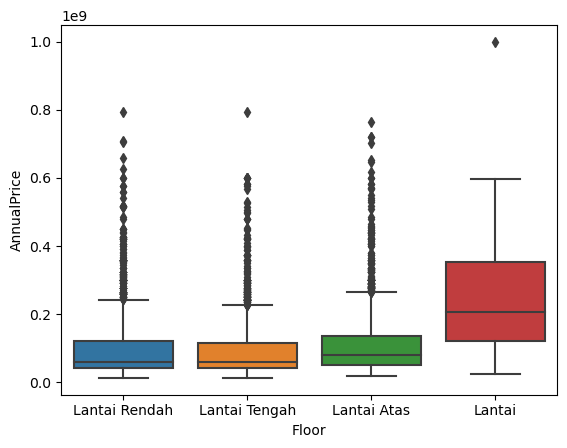

In [67]:
sns.boxplot(x = "Floor", y = 'AnnualPrice', data = df)

Not only the discrepancy among all floor locations seem to be miniscule, we also have quite a few apartment units with no labels of their floor location. For now, let's not use this categorical variable in our model.

In [68]:
df = df.drop(['Floor'], axis = 'columns')
df = df.reset_index(drop = True, inplace=False)

#### Analyzing Area of Units to AnnualPrice

In [78]:
df[['Area']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5242 entries, 0 to 5302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    5242 non-null   object
dtypes: object(1)
memory usage: 81.9+ KB


In [80]:
df['Area'] = pd.to_numeric(df['Area'])

C:\Users\grady\AppData\Local\Temp\ipykernel_15756\812294141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = pd.to_numeric(df['Area'])


<Axes: xlabel='Area', ylabel='AnnualPrice'>

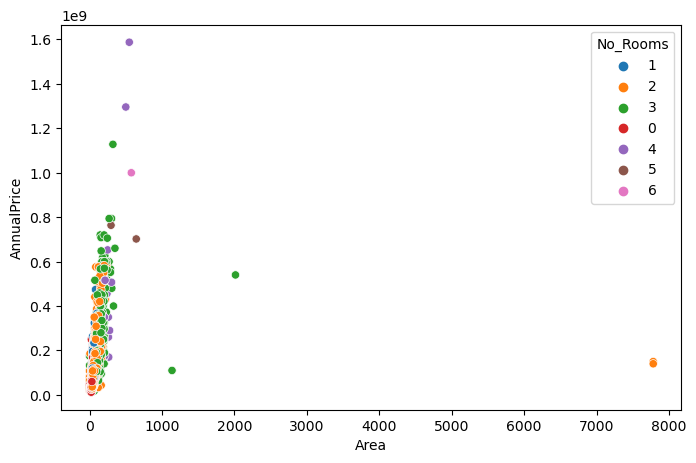

In [81]:
dims = (8,5)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x = "Area", y = 'AnnualPrice', data = df, hue = 'No_Rooms', ax=ax)

Based on the above plot, we can see that the general trend is that AnnualPrice increases as Area increases. We also see that as number of bedrooms increases, area also increases. However, there are a few data points which are scattered far from the others that we need to investigate. They could be outliers and we should remove them.

In [71]:
df[['URL', 'Area']].sort_values(by=['Area'], ascending = False).head(12)

,URL,Area
4524,https://jendela360.com/sewa-apartemen-the-accent-bintaro/tacc002,7781.0
4794,https://jendela360.com/sewa-apartemen-the-accent-bintaro/tacc001,7781.0
4741,https://jendela360.com/sewa-apartemen-kemang-village-apartment/kmvd027,2014.0
4957,https://jendela360.com/sewa-apartemen-maqna-residence/mqrd023,1138.0
732,https://jendela360.com/sewa-apartemen-casablanca-apartment/csbe001,644.0
3564,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stme008,576.0
3307,https://jendela360.com/sewa-apartemen-sudirman-residence/sdrd002,350.0
3597,https://jendela360.com/sewa-apartemen-ancol-mansion-apartment/anmd003,330.0
1092,https://jendela360.com/sewa-apartemen-st-moritz-apartment/stmd027,307.0
4333,https://jendela360.com/sewa-apartemen-nirvana-residence/nvn-e0001,303.0


There are six apartment units with areas above 500 meter squared. That's a huge apartment unit - two of them even reaches more than seven thousand meter squared. These units are not what in most people's mind when they're looking to rent an apartment unit - as these units come in the form of condominium or penthouse. We'll be removing these six units from our data set. In the deployment stage of this machine learning model, we'll limit the maximum Area to be 350 meter squared, as that is already a very big apartment unit.

In [82]:
df = df[df['Area']<=350]

In [83]:
df = df.reset_index(drop = True, inplace=False)
df.shape

(5234, 39)

<Axes: xlabel='Area', ylabel='AnnualPrice'>

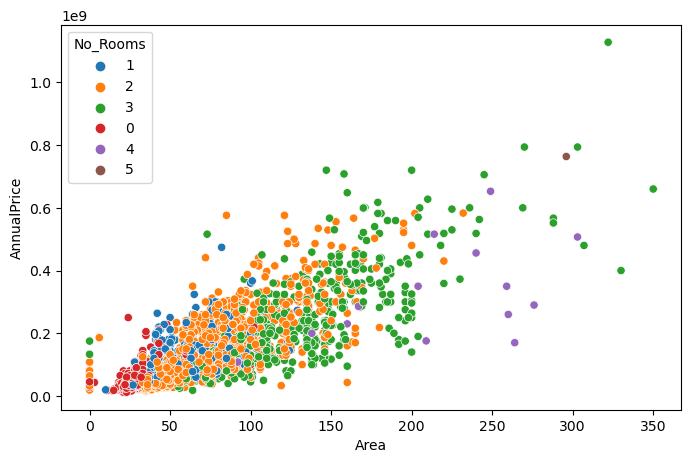

In [84]:
dims = (8,5)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x = "Area", y = 'AnnualPrice', data = df, hue = 'No_Rooms', ax=ax)

In [85]:
df = df[df['Area'] > 0]

This visualization made more sense as there are no far outliers. However, something we notice is that there are some apartment units which are listed as having 0 Area. We'll simply remove these units as it's impossible for apartment units to have 0 meter squared of area. We'll consider than 20 meter squared is the minimum apartment unit area. 

We'll be also removing apartments with more than 250 meter squared because they don't seem to be that common, and most people's preferences are apartments below 200 meter squared.

In [86]:
df = df[df['Area']>20]
df = df[df['Area']<350]

In [87]:
df.columns

Index(['Index', 'URL', 'Unit_ID', 'No_Rooms', 'Bathroom', 'Locality', 'Region',
       'Longitude', 'Latitude', 'Furnished', 'Area', 'Floor', 'AC',
       'Water_Heater', 'Dining_Set', 'Electricity', 'Bed', 'Access_Card',
       'Kitchen', 'Fridge', 'Washing_Machine', 'TV', 'ATM', 'TV_Cable',
       'Grocery', 'Internet', 'Swim_Pool', 'Laundry', 'Security', 'Basketball',
       'Multipurpose_Room', 'Gym', 'Jogging', 'Tennis', 'Restaurant',
       'Playground', 'Total_Facilities', 'AnnualPrice', 'FurnishedNew'],
      dtype='object')

# Recap

1. Kolom 'No_Rooms' problematik --> ada 1 apartment studio yang harga sewa tahunannya itu mencapai lebih dari puluhan miliar. Hasil: dihapus
2. Kolom 'Region' difokuskan untuk 'Region' di Jabodetabek saja. Dari sini, kita belajar bahwa lokasi juga menentukan harga dari Apartment. 
3. Kita hanya menyaring apartment yang luasnya di antara 20 - 350, dan membuang apartment lain yang tidak berada dalam range tersebut. Kita juga melihat bahwa semakin luasnya suatu apartment, maka harganya pun juga semakin tinggi

# Deep Dive Questions
1. Mana faktor yang paling berpengaruh terhadap harga. Luas, atau Region. Apartmen 1BR di Jakarta Selatan vs Apartment 3BR di Bogor, mana yang lebih mahal? 

2. Dari kolom-kolom 'facilities'. Fasilitas mana, yang kalau ada, mengindikasikan apartmen tersebut adalah apartemen mahal. Fasilitas mana, yang langka ditemui di apartmen murah, namun umum ditemui di apartmen mahal. 

3. Apakah semakin banyak fasilitas, harga apartemen juga semakin mahal? Atau sebenarnya, ada beberapa fasilitas tertentu yang membuat harga apartmen mahal. Apartemen yang fasilitasnya banyak VS Apartemen yang fasilitasnya lebih sedikit, tapi menghadirkan fasilitas-fasilitas high-class (water heater, dll), mana yang lebih mahal? 

In [95]:
df_1 = df[(df['No_Rooms'] == '1') & (df['Region'] == 'Jakarta Selatan')]
df_2 = df[(df['No_Rooms'] == '3') & (df['Region'].isin(['Bogor', 'Tangerang', 'Depok', 'Bekasi']))]

In [90]:
df_1['AnnualPrice'].mean()

120010613.02681993

In [96]:
df_2['AnnualPrice'].mean()

45500000.0

Ternyata, yang lebh berdampak terhadap harga adalah Lokasi, bukan jumlah kamar/luas. Karena, apartemen yang luas tapi di BoDeTaBek, lebih murah daripada apartemen hanya 1 bedroom, namun di daerah SCBD Jakarta Selatan. 

#### Checking Categorical Facility Features

Our last sets of features are the facilities that each unit has. During the web scraping process, I added a column in which it counts how many of these features that the unit has, and store them in a column called 'Total_Facilities'. Let's first take a look at this column, before diving into other facilities one-by-one.

<Axes: xlabel='Total_Facilities'>

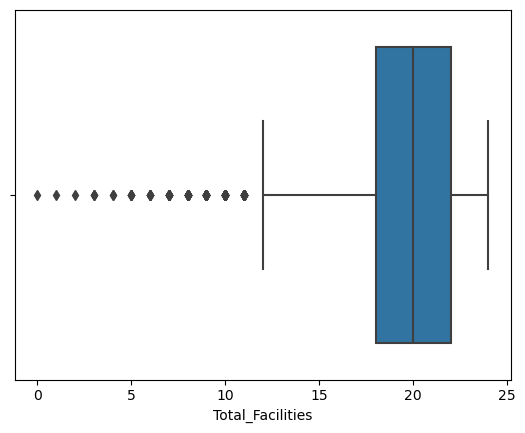

In [77]:
Facilities_Int = list()
for i, count in enumerate(df.Total_Facilities):
    Facilities_Int.append(int(count))

df.drop(['Total_Facilities'], axis = 'columns')
df['Total_Facilities'] = Facilities_Int

sns.boxplot(x="Total_Facilities", data = df)

<Axes: xlabel='Total_Facilities', ylabel='AnnualPrice'>

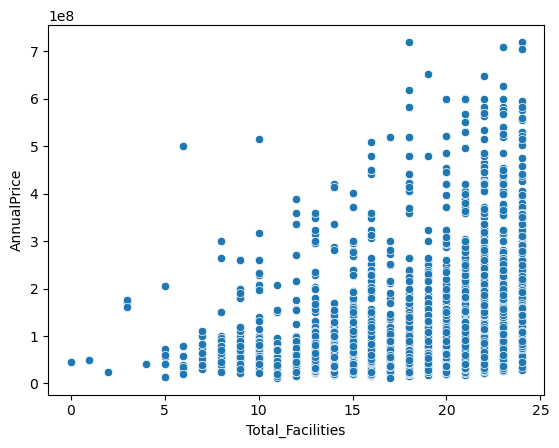

In [78]:
sns.scatterplot(x="Total_Facilities", y = "AnnualPrice", data = df)

It seems that most apartment units have at least 10 facilities. The more facilities a unit has, the higher its rent price is. Let's take a look at the units which has features less than 10, and see if they actually have less than 10 features, or there are some errors here.

In [79]:
df[['URL', 'Total_Facilities', 'AnnualPrice', 'Furnished']].sort_values(by = ['Total_Facilities'], ascending = True).head(10)

,URL,Total_Facilities,AnnualPrice,Furnished
2981,https://jendela360.com/sewa-apartemen-skyline-paramount-serpong/spsa001,0,45000000.0,1
3179,https://jendela360.com/sewa-apartemen-amartapura-apartment/amtd001,1,50000000.0,0
1289,https://jendela360.com/sewa-apartemen-tree-park-bsd/tpba002,2,25000000.0,0
351,https://jendela360.com/sewa-apartemen-parama-apartment/pmcd003,3,170000000.0,1
4291,https://jendela360.com/sewa-apartemen-parama-apartment/pmcd001,3,162000000.0,0
974,https://jendela360.com/sewa-apartemen-parama-apartment/pmcd002,3,175000000.0,1
4105,https://jendela360.com/sewa-apartemen-vittoria-residence/vtrc005,4,40000000.0,0
995,https://jendela360.com/sewa-apartemen-puri-mansion/puma051,4,40000000.0,0
517,https://jendela360.com/sewa-apartemen-kebayoran-icon-apartment/ikaa001,5,72000000.0,1
2538,https://jendela360.com/sewa-apartemen-vittoria-residence/vtrc001,5,40000000.0,0


The apartment units with low Total_Facilities tend to be Non-Furnished units. However, there's an oddball here - the unit with 0 'Total_Facilities' is a fully-furnished unit! Upon further investigation, based on the photos of the room, there are indeed facilities and it might be some errors in inputing the data (or the unit owner/seller does not describe the facilities fully). We are going to remove that unit from our dataset. As for the other fully-furnished unit with only 3 total facilities, the page and pictures show that it is indeed quite a blank unit. There are beds and sofas - but there is no fancy facilities like TV or Internet. 

In [80]:
i = df[((df.Unit_ID == 'spsa001'))].index
df = df.drop(i)
df = df.reset_index(drop = True, inplace=False)

Next, we are going to draw boxplots of each facilities. To recall, if a facility is present in a unit, it will has value '1', if not, it will have the value of '0'. We would like to see if the presence of these facilities impact the annual rent price of apartment units. We'll remove facilities whose existence (or inexistence) does not impact the annual rent price. 

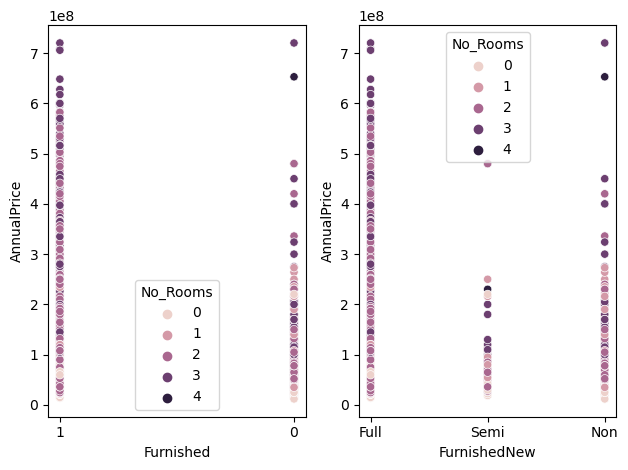

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.scatterplot(x = "Furnished", y = 'AnnualPrice', data = df, hue = 'No_Rooms', ax=ax1)
sns.scatterplot(x = "FurnishedNew", y = 'AnnualPrice', data = df, hue = 'No_Rooms', ax=ax2)
fig.tight_layout()

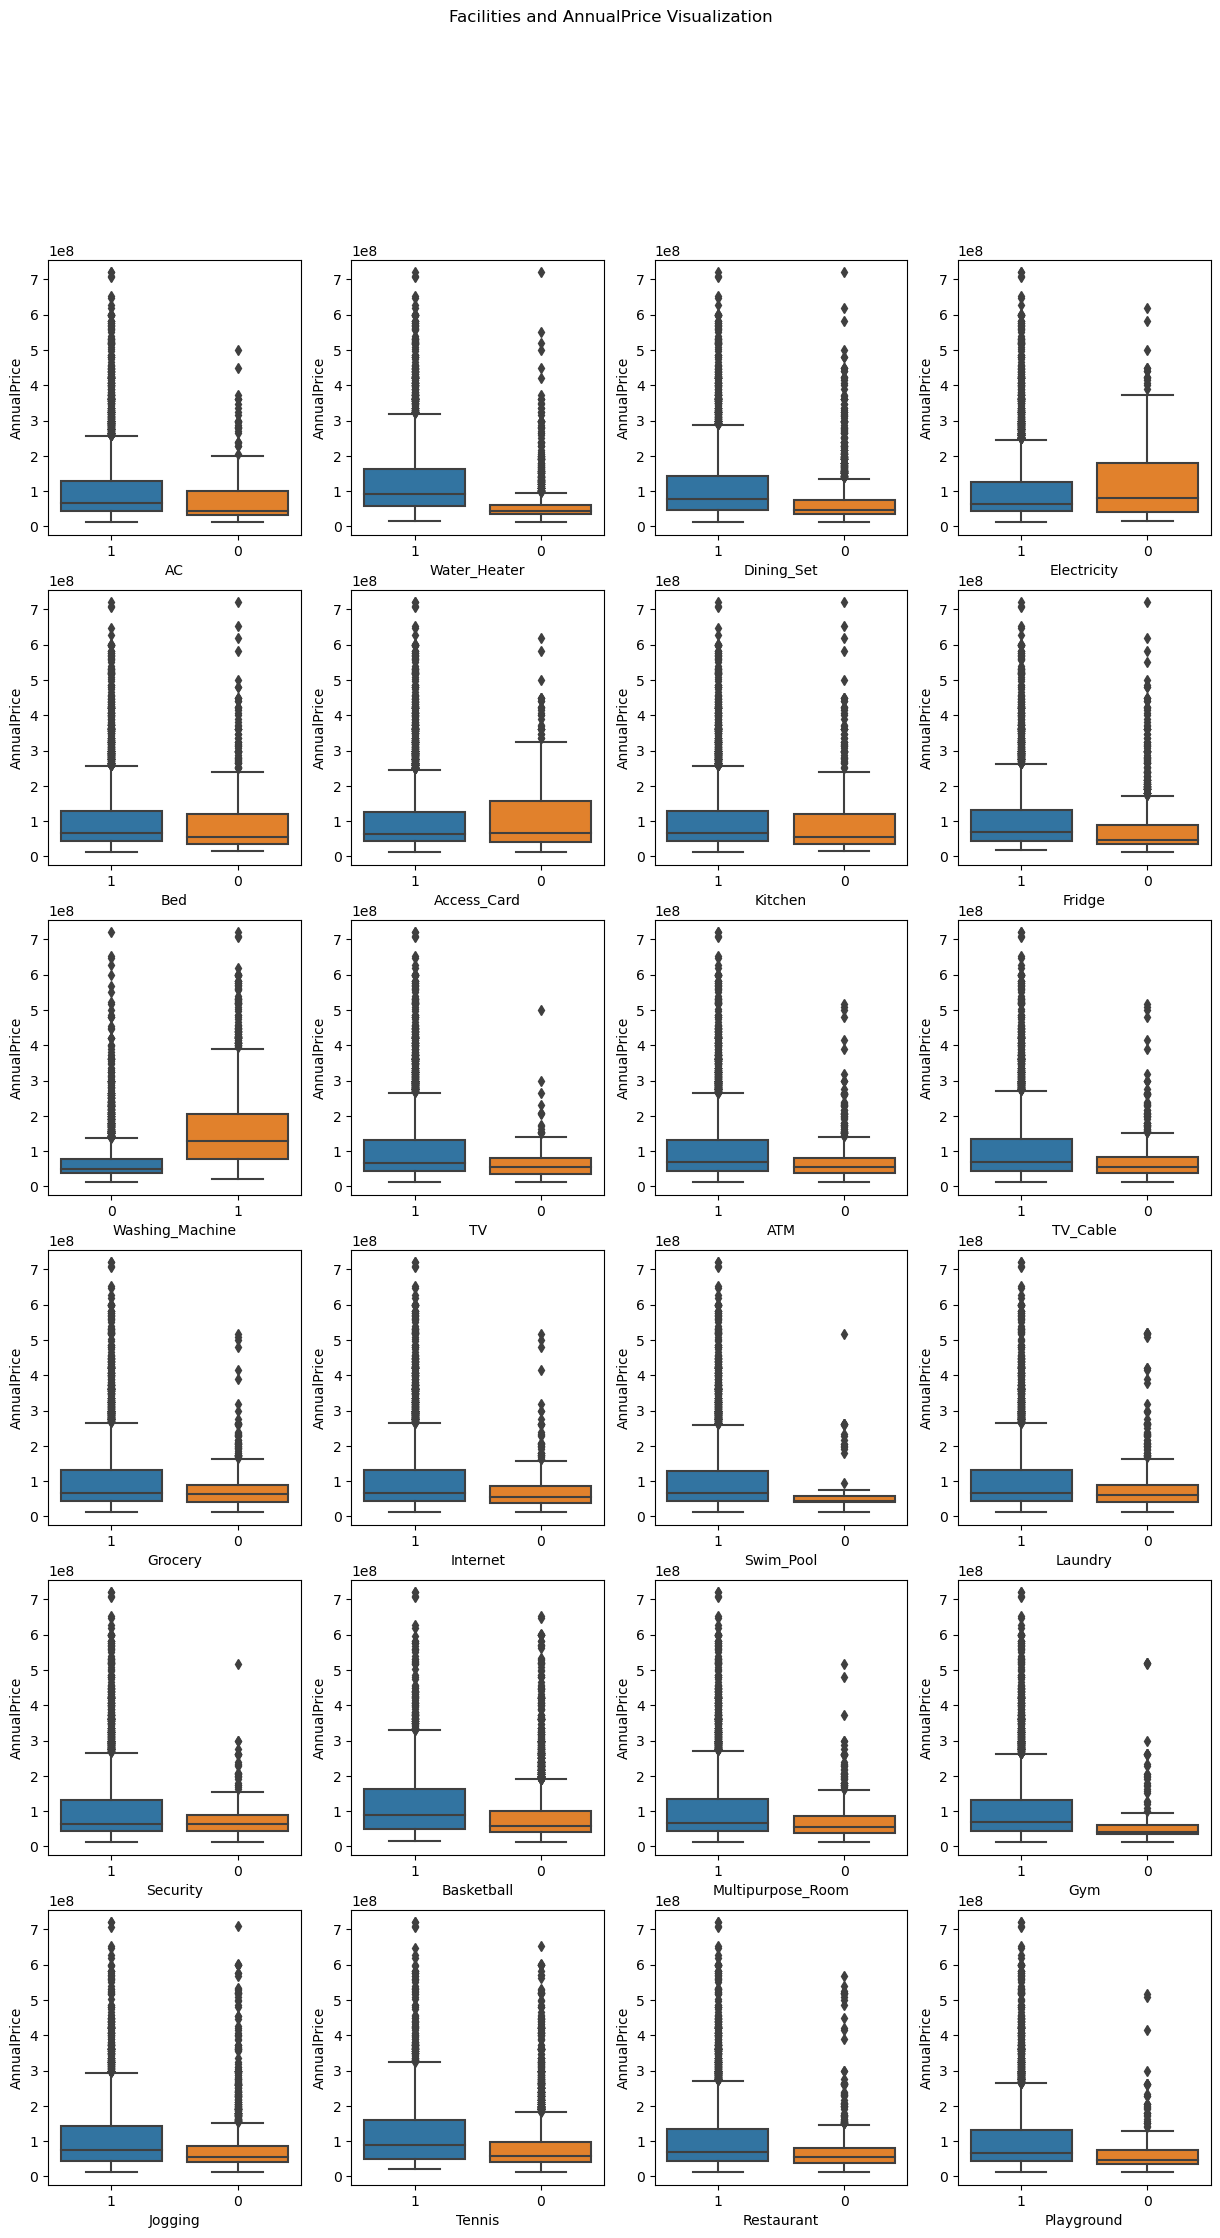

In [82]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8),
     (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16),
     (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24)) = plt.subplots(6, 4, figsize = (15,25))
fig.suptitle('Facilities and AnnualPrice Visualization')
for i, ax in enumerate(fig.get_axes()):
    column = df.columns[i+11]
    sns.boxplot(x = column, y = 'AnnualPrice', data = df, ax = ax)

Based on the visualization above, for each facilities, the trend is clear - the presence of facilities affects the unit annual rent price positively. This proves to be quite troublesome when we want to do feature selection - we don't know which facility is less important than the other. We'll keep most facilities for the most part, but we'll reomve two of them right away - 'Electricity' and 'Access Card'. Why? Because most apartment units have them - it's not a 'facility' anymore - it is a necessity. There are 300-400 apartments which are listed as having no 'Electricity', but it doesn't really make sense. We do this because we are thinking about the deployment phase of our model. Our future users won't choose to have an apartment unit without 'Electricity' or 'Access Card'.

This concludes our first part. To recap, we have:
- removed uninsightful columns
- checked and removed outliers
- fixed abnormal data (latitude and misused currency)
- visualize features

We also now have a rough understanding on the annual rent price of apartment units in Jakarta: the most expensive apartments are usually found at Jakarta Selatan - and the more area a unit occupies, the more bedrooms & facilities it has, the higher its annual rent price is. 

In the next part, we are going to:
- scale numerical features
- split the dataset into testing and training set
- create and evaluate baseline model
- conduct feature engineering based on the feedback gained on baseline model
- test new models and decide which model is the best

In [83]:
df.to_csv('Cleaned Apartment Data.csv')